# Perform EDA
- Perform descriptive statistics
- Create visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

In [2]:
# SET VIZ TEMPLATE
# colors
YELLOW='yellow'
BLACK='#1a1a1a'
GREY='#696969'
WHITE='white'

# fonts
futura_font_path = 'graphfonts/Futura/futura-medium-condensed.ttf'
paypal_font_path = 'graphfonts/Paypal/PayPalSansSmall-Regular.ttf'
FUTURA = fm.FontProperties(fname=futura_font_path)
PAYPAL = fm.FontProperties(fname=paypal_font_path)

DPI=300

In [3]:
df = (pd.read_csv('f_csv/finance_movies.csv')
 .astype({'year': 'int16', 'minutes': 'int16'})
)
df

,movie,year,description,rating,minutes,script
0,Margin Call,2011,Set in the early stages of the 2008 financial ...,7.1,107,Is that them? Jesus Christ. Are they going to ...
1,Wall Street,1987,This is the classic film that started it all. ...,7.3,126,Easy! Excuse me! Good morning. Jackson Steinem...
2,The Big Short,2015,"Based on the book by Michael Lewis, The Big Sh...",7.8,130,"Frank. How are the wife and kids? You know, fo..."
3,Trading Places,1983,"Being the only pure comedy on this list, Tradi...",7.5,118,"Your breakfast, sir. Pork bellies! I have a hu..."
4,The Wolf of Wall Street,2013,"Directed by Martin Scorsese, The Wolf of Wall ...",8.2,180,The world of investing can be a jungle. Bulls....
5,American Psycho,2000,American Psycho is a cult classic in Wall Stre...,7.6,104,rare roasted partridge breast in raspberry cou...
6,Arbitrage,2012,Arbitrage is a 2012 film that tells the story ...,6.6,107,But you took a huge bet on the housing crisis ...
7,Equity,2016,Equity follows the story of Naomi Bishop (Anna...,5.6,100,The entire market is watching? Back with Dynac...
8,Inside Job,2010,Though this movie is technically a documentary...,8.2,108,Iceland is a stable democracy with a high stan...
9,Boiler Room,2000,Boiler Room tells the story of Seth Davis (Gio...,7.0,120,I read this article a while back that said Mic...


In [4]:
#check if the column is unique
for i in df.columns:
  print(f'{i} is unique: {df[i].is_unique}')

movie is unique: True
year is unique: False
description is unique: True
rating is unique: False
minutes is unique: False
script is unique: True


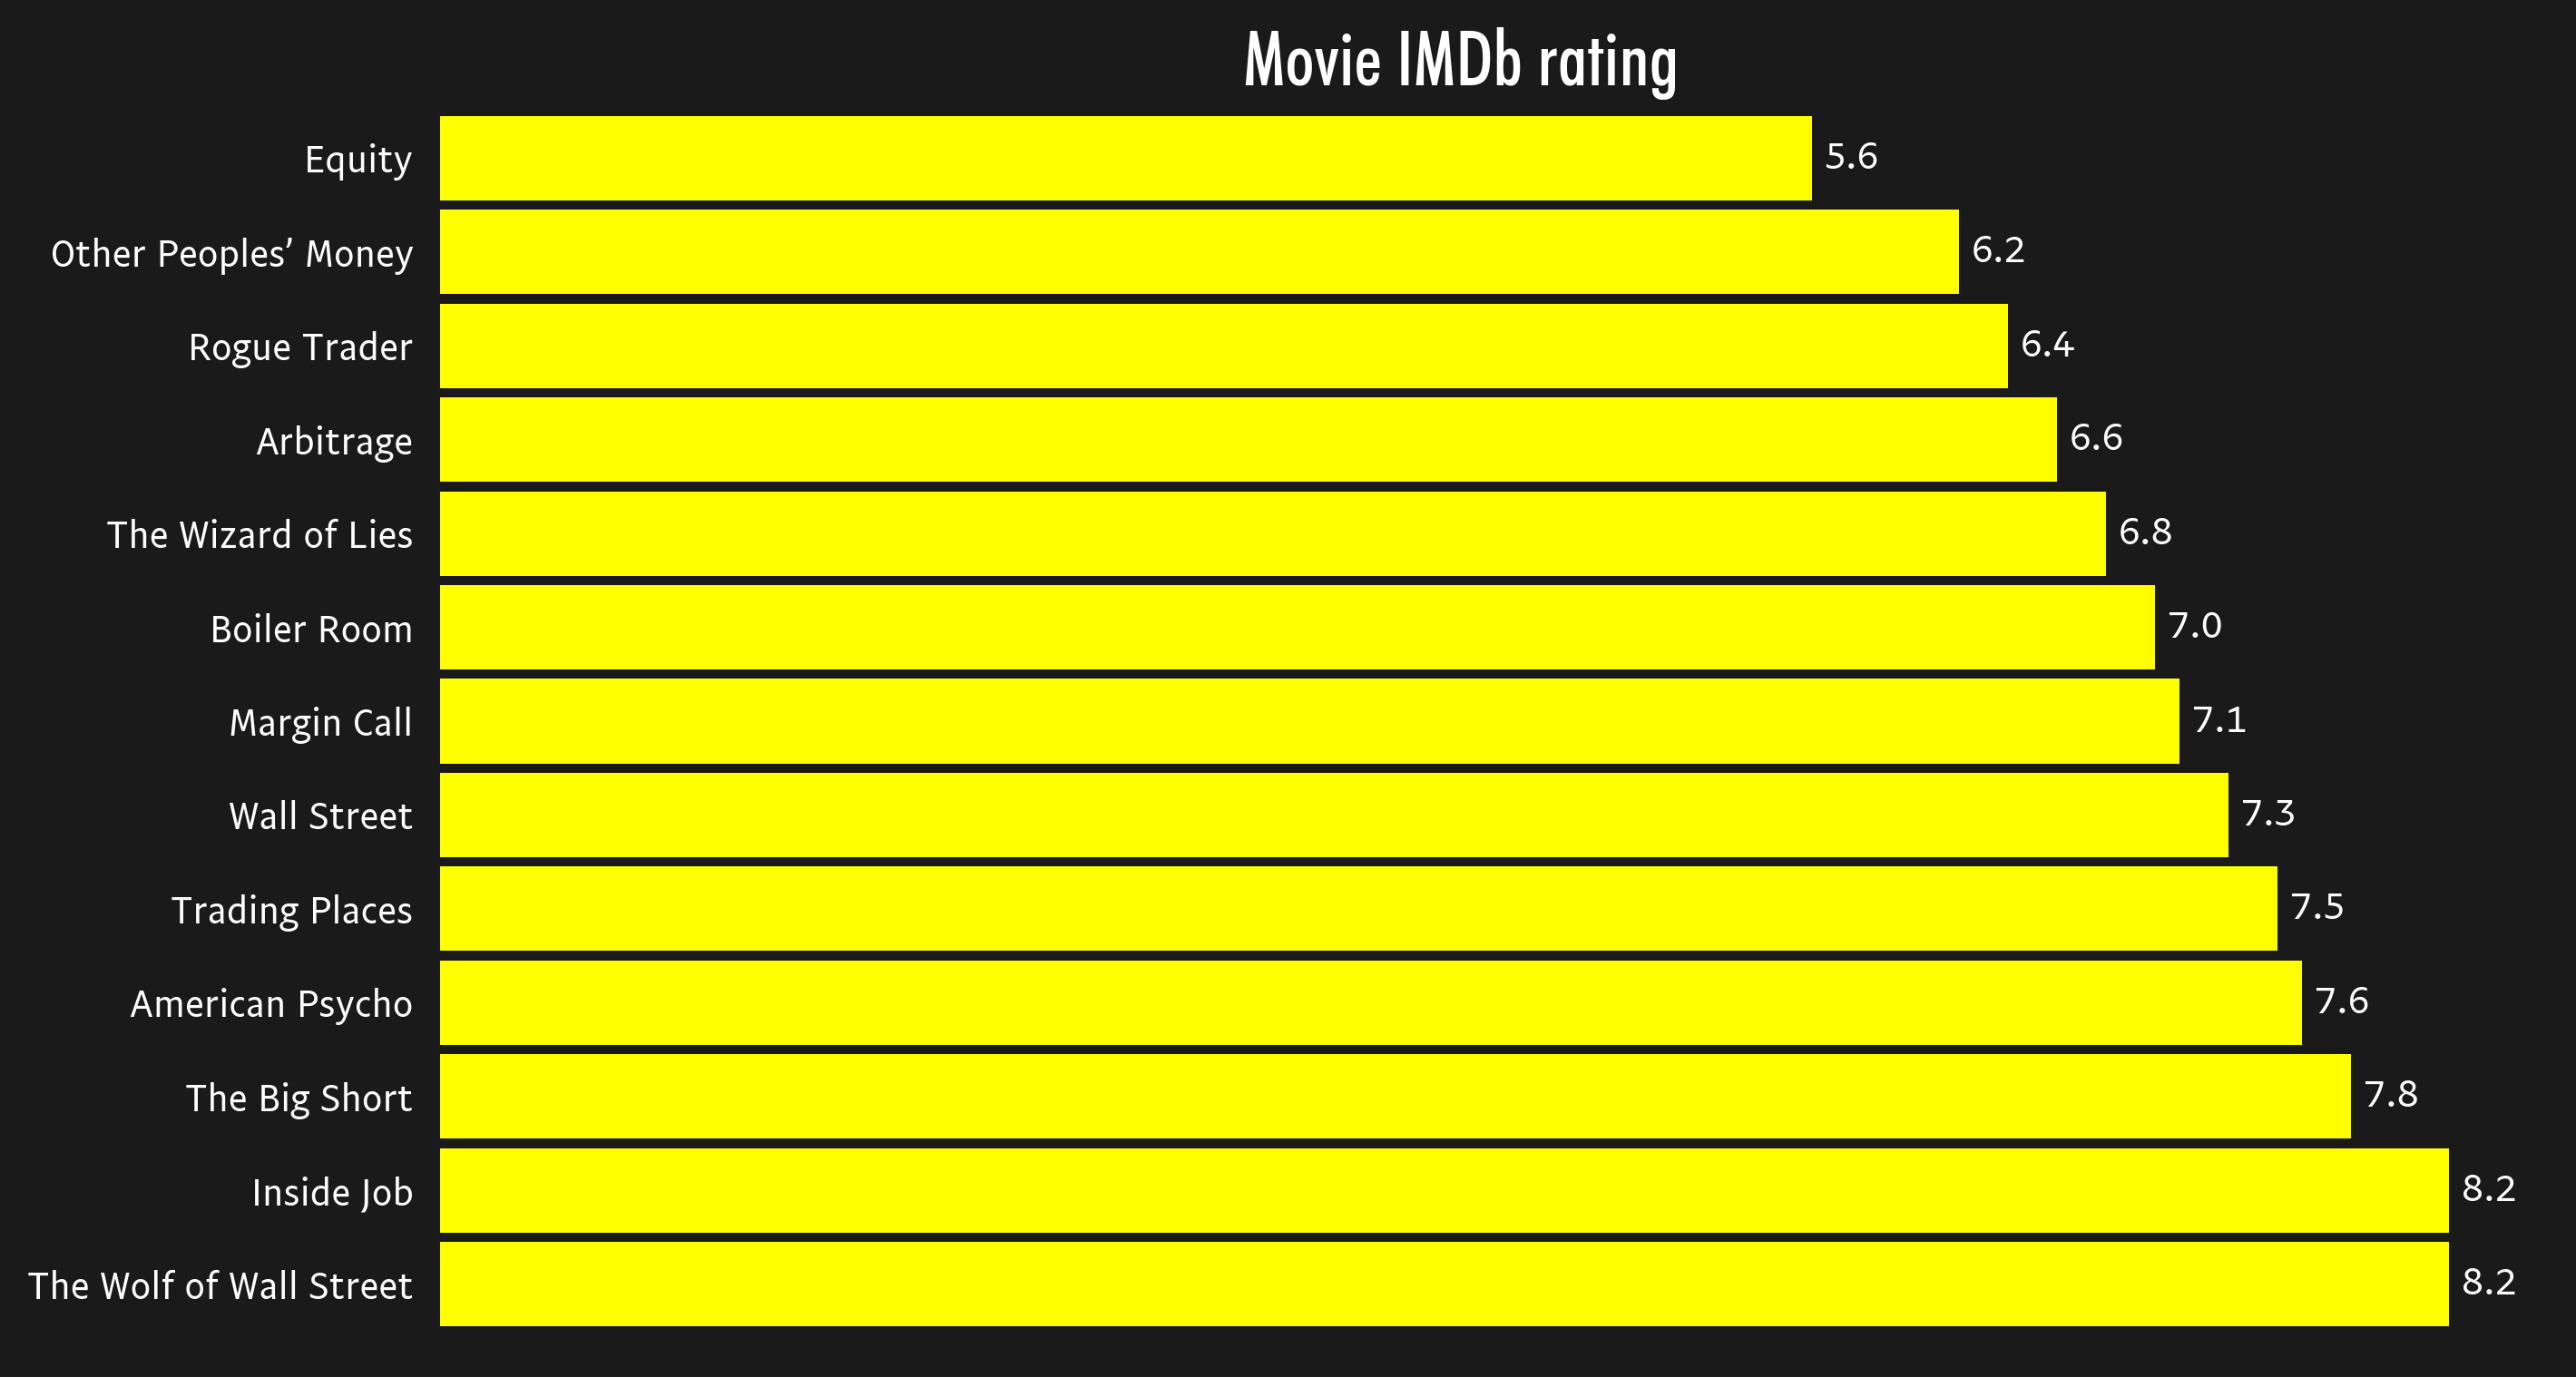

In [5]:
# plot rating
fig, ax = plt.subplots(figsize=(10,6), dpi=DPI, facecolor=BLACK)
ax.set_facecolor(BLACK)
ratings = (df
 .loc[:, ['movie', 'rating']]
 .set_index('movie')
 .rename_axis(None, axis=0)
 .sort_values('rating', ascending=False)
)

(ratings
 .plot.barh(width=.9, rot=0, ax=ax, legend=False, color=YELLOW)
)
fig.suptitle('Movie IMDb rating', fontproperties=FUTURA, c=WHITE, fontsize=20, y=.92)
for side in 'bottom,top,right,left'.split(','):
    ax.spines[side].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(left=False, colors=WHITE, labelsize=12) # set font size of y-tick labels
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=PAYPAL) # set font family of y-tick labels
for i, (movie, rating) in enumerate(ratings.itertuples()):
    ax.text(rating+.05, i, f'{rating}', ha='left', va='center', c=WHITE, fontproperties=PAYPAL)

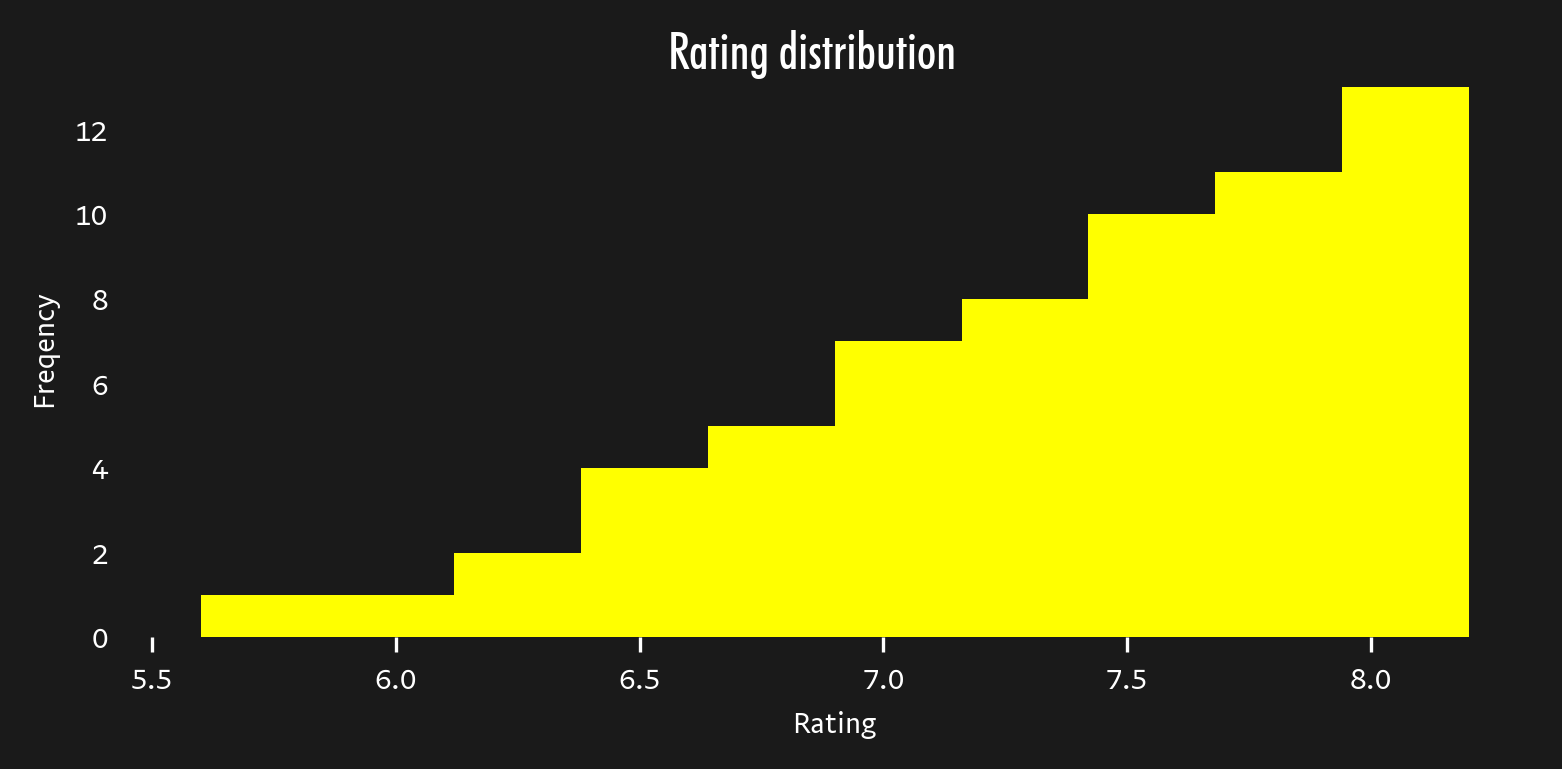

In [60]:
# plot rating cumulative histogram 
fig, ax = plt.subplots(figsize=(6,2.5), dpi=DPI, facecolor=BLACK)
ax.set_facecolor(BLACK)
(df
 .rating
 .plot.hist(cumulative=True, color=YELLOW, ax=ax, fontsize=5)
)

ax.set_ylabel('Freqency', color=WHITE, fontproperties=PAYPAL, fontsize=7)
ax.set_xlabel('Rating', color=WHITE, fontproperties=PAYPAL, fontsize=7)
fig.suptitle('Rating distribution', fontproperties=FUTURA, c=WHITE, fontsize=12, y=.92)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(PAYPAL)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(PAYPAL)
for side in 'left,bottom,top,right'.split(','):
    ax.spines[side].set_visible(False)
ax.tick_params(left=False, colors=WHITE, labelsize=7)

We can see that we have one movie at the rating of 5.6 and 10 movies at the rating of 7.6  
This gives us an idea of the overall distribution of ratings in the dataset, and how many movies fall within different rating ranges.

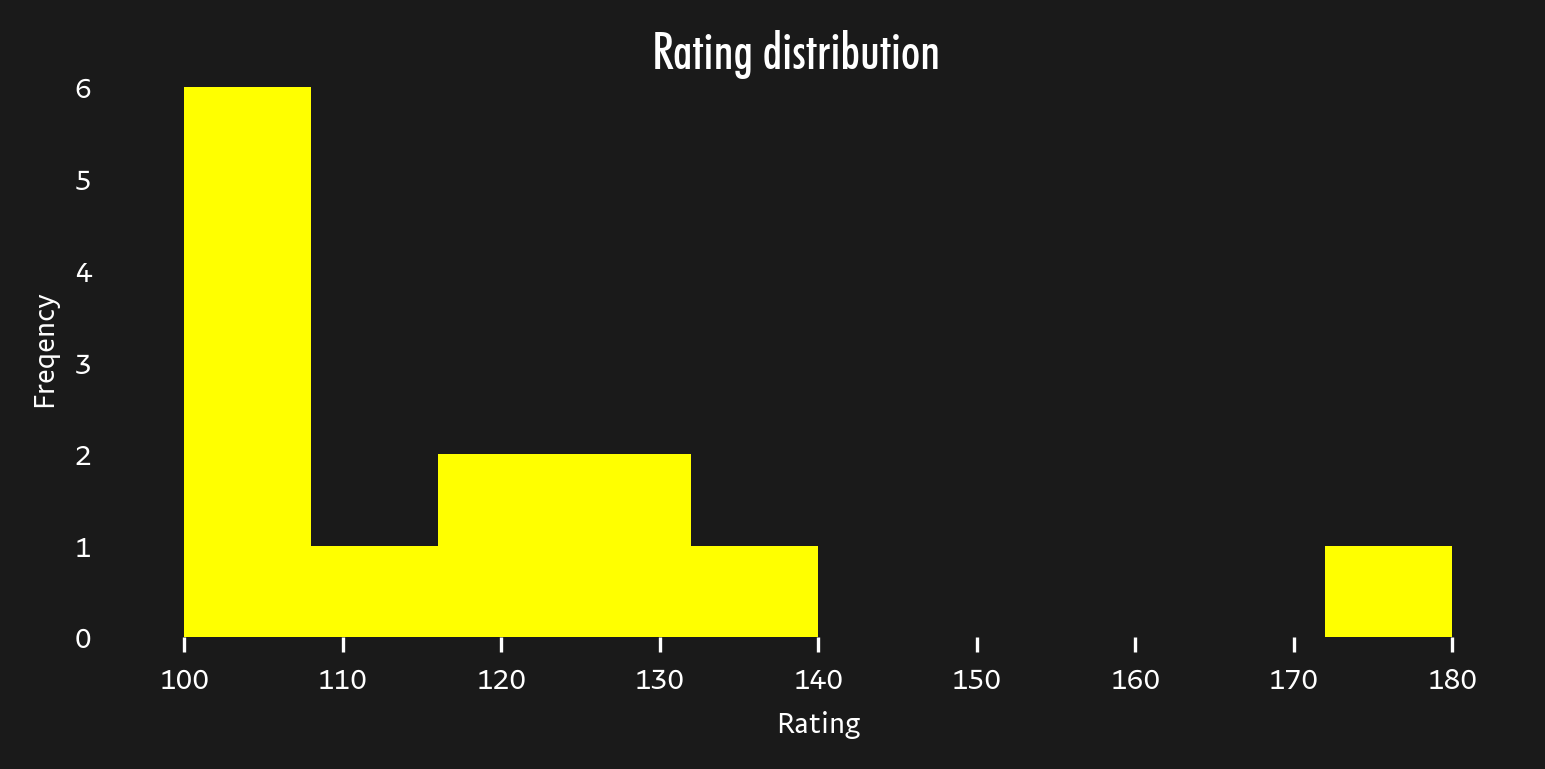

In [70]:
## Which minute count range has the most movies

# plot minutes cumulative histogram 
fig, ax = plt.subplots(figsize=(6,2.5), dpi=DPI, facecolor=BLACK)
ax.set_facecolor(BLACK)
(df
 .minutes
 .plot.hist(color=YELLOW, ax=ax, fontsize=5)
)
fig.suptitle('Rating distribution', fontproperties=FUTURA, c=WHITE, fontsize=12, y=.92)
ax.set_ylabel('Freqency', color=WHITE, fontproperties=PAYPAL, fontsize=7)
ax.set_xlabel('Rating', color=WHITE, fontproperties=PAYPAL, fontsize=7)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(PAYPAL)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(PAYPAL)
for side in 'left,bottom,top,right'.split(','):
    ax.spines[side].set_visible(False)
ax.tick_params(left=False, colors=WHITE, labelsize=7)

Most movies are a little less than 2 hours and a few are above 2 hours. Then there's one more thats 3 hours.

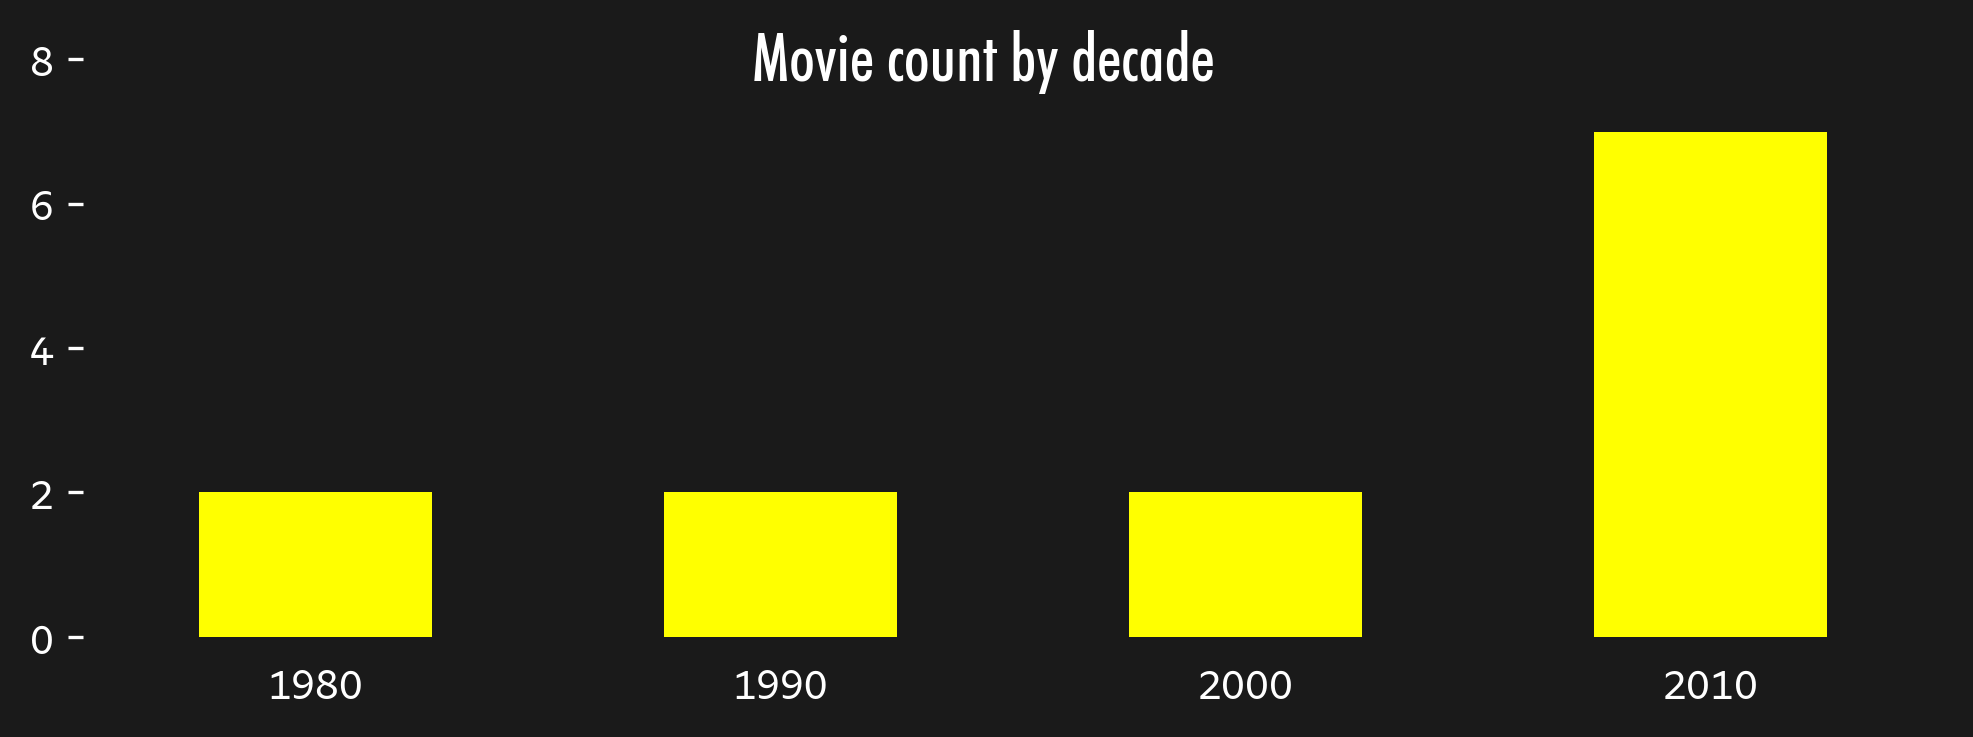

In [71]:
## Which decade had the most movies?

# plot decade count
fig, ax = plt.subplots(figsize=(8,2.5), dpi=DPI, facecolor=BLACK)
ax.set_facecolor(BLACK)
decades = (df
 .groupby(df.year // 10*10) #group by decade
 .size()
)

(decades
 .plot.bar(width=.5, ax=ax, color=YELLOW, rot=0)
)
ax.set_ylim([0, 8])
ax.tick_params(axis='x', colors=WHITE)
ax.tick_params(axis='y', colors=WHITE)
fig.suptitle('Movie count by decade', fontproperties=FUTURA, c=WHITE, fontsize=16, y=.92)
ax.set_ylabel('', fontproperties=PAYPAL, fontsize=10)
ax.set_xlabel('', fontproperties=PAYPAL, fontsize=10)
ax.tick_params(bottom=False)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(PAYPAL)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(PAYPAL)
for side in 'left,bottom,top,right'.split(','):
    ax.spines[side].set_visible(False)

In terms of good Wall Street movies, the 2010s were the best

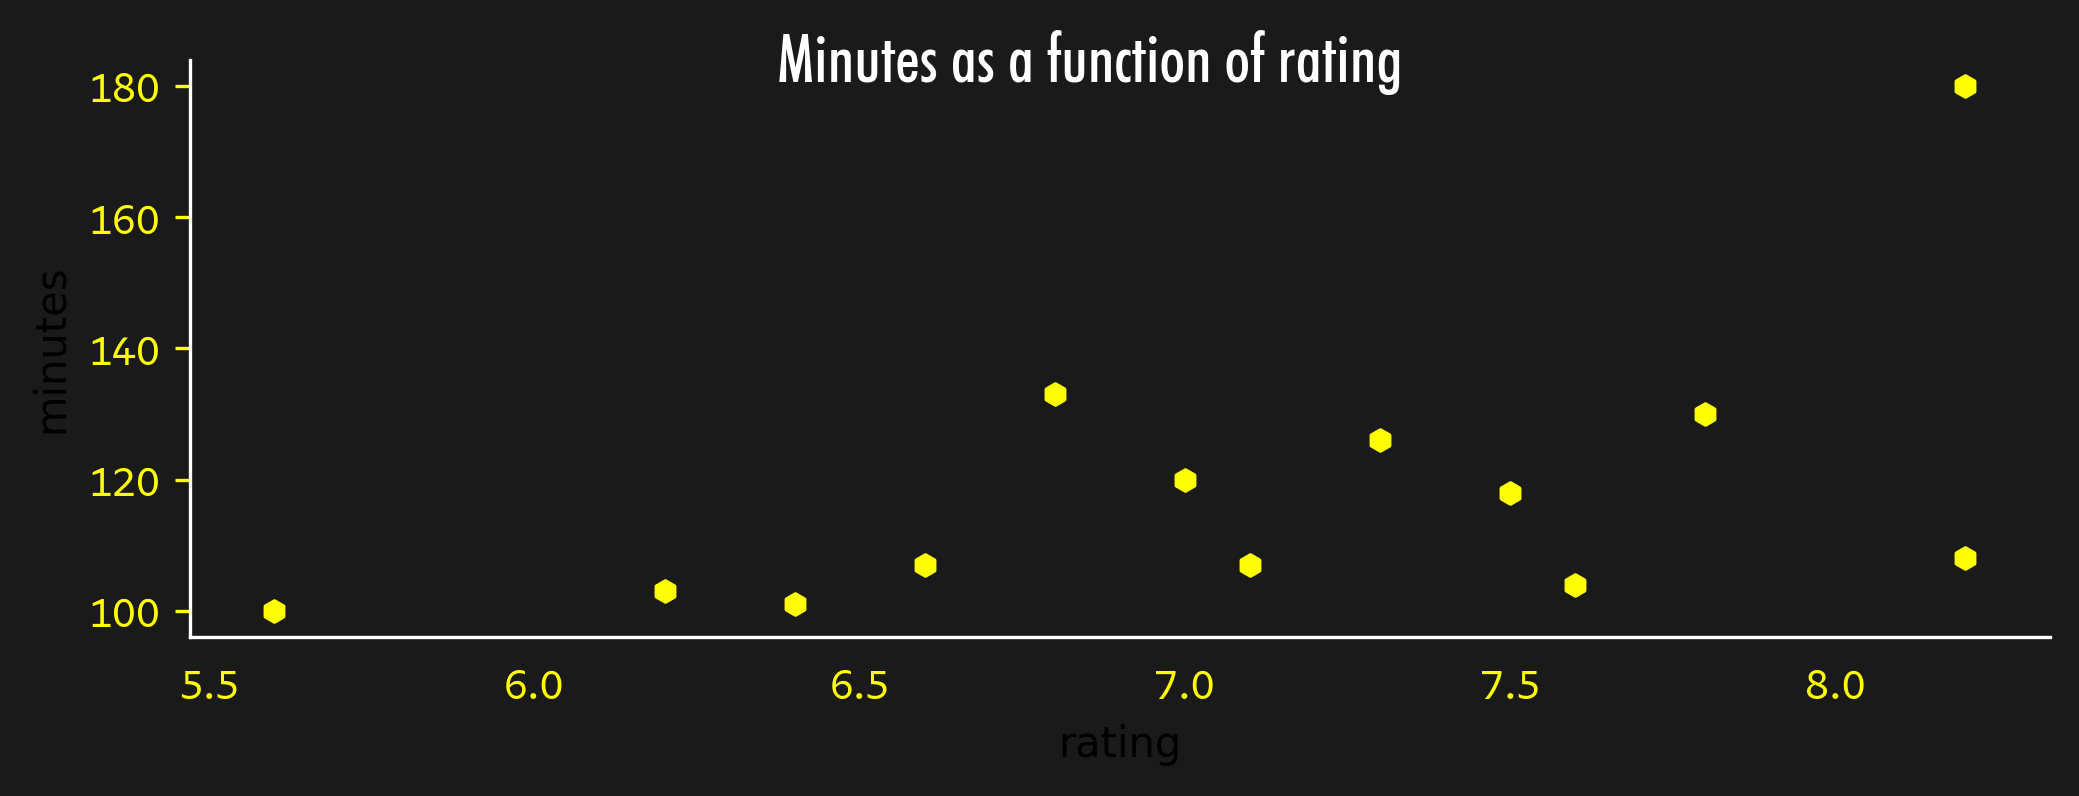

In [92]:
fig, ax = plt.subplots(figsize=(8,2.5), dpi=DPI, facecolor=BLACK)
ax.set_facecolor(BLACK)

(df
 [['rating', 'minutes']]
 .plot.scatter('rating', 'minutes', ax=ax, color=YELLOW, marker='h', s=24)
)
fig.suptitle('Minutes as a function of rating', fontproperties=FUTURA, c=WHITE, fontsize=16, y=.92)
ax.tick_params(bottom=False)
ax.tick_params(axis='x', colors=YELLOW)
ax.tick_params(axis='y', colors=YELLOW)
for tick in ax.get_xticklabels():
    tick.set_fontproperties(PAYPAL)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(PAYPAL)
for side in 'top,right'.split(','):
    ax.spines[side].set_visible(False)
for side in 'bottom,left'.split(','):
    ax.spines[side].set_color(WHITE)

There's nore relationship between how long the movie is and how it's rated.

# END